<a href="https://colab.research.google.com/github/iamsoankit/VectorDB-/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [16]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df = pd.read_csv('/content/ModApte_train.csv')


In [18]:
df = df.dropna(subset=['text'])


In [35]:
def preprocess_text(text):
    # removed non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower().strip()

    # tokenized the text
    tokens = word_tokenize(text)

    # removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # lemmatizing the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

In [7]:
df['cleaned_text'] = df['text'].apply(preprocess_text)


In [9]:
df.to_csv('/content/sample_data.csv', index=False)


In [10]:
print("Preprocessing complete. Preprocessed dataset saved.")


Preprocessing complete. Preprocessed dataset saved.


In [11]:
df = pd.read_csv('/content/sample_data.csv')

In [12]:
preprocessed_texts = df['cleaned_text'].values

In [20]:
vectorizer = TfidfVectorizer(max_features=800)
tfidf_vectors = vectorizer.fit_transform(preprocessed_texts)

In [22]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(reduced_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

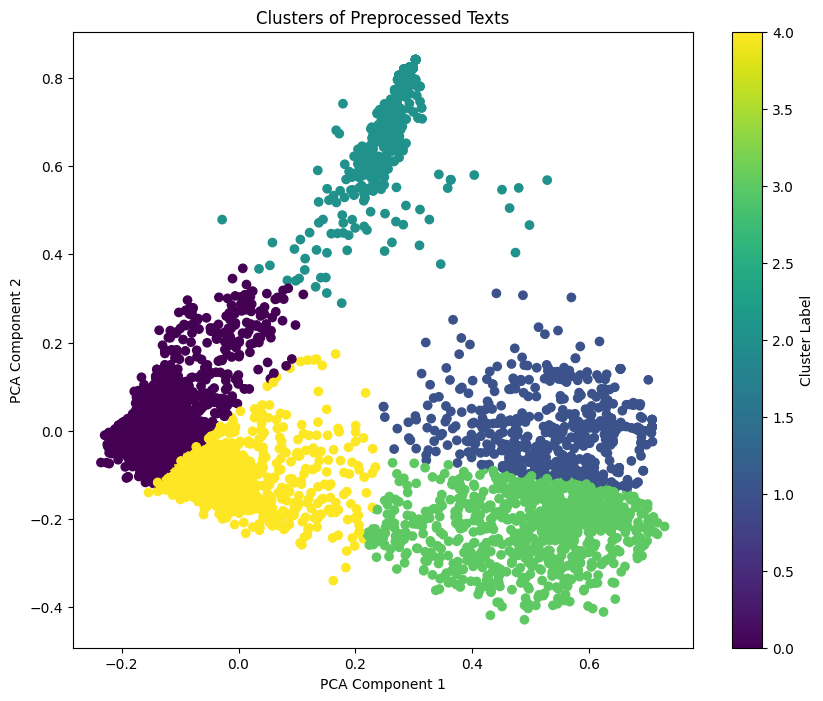

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('clusters of preprocessed texts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [29]:
query = "central bank monetary policy"


In [30]:
preprocessed_query = preprocess_text(query)


In [31]:
query_vector = vectorizer.transform([preprocessed_query]).toarray()


In [32]:
cosine_similarities = cosine_similarity(query_vector, tfidf_vectors).flatten()


In [33]:
document_ranking_indices = np.argsort(cosine_similarities)[::-1]


In [34]:
top_n = 5

print("Top {} most relevant documents:".format(top_n))
for i in range(top_n):
    doc_index = document_ranking_indices[i]
    print(f"Document {doc_index} (Score: {cosine_similarities[doc_index]:.4f}): {df.iloc[doc_index]['text'][:100]}...")


Top 5 most relevant documents:
Document 8661 (Score: 0.4428): Bundesbank council member Lothar
Mueller said the bank has not given up its money supply policy
and ...
Document 3377 (Score: 0.3956): The Bank of Japan is satisfied with the
yen around its current range, a senior central bank official...
Document 1162 (Score: 0.3948): The Nigerian naira firmed 2.6 pct against
the dollar after 17 banks were disqualified from bidding a...
Document 5708 (Score: 0.3936): Robert Heller, a member of the Board
of Governors of the Federal Reserve System, said commodity
pric...
Document 6943 (Score: 0.3820): Bank of Japan governor Satoshi Sumita
said the central bank will carefully consider its monetary
pol...
